## Notes on [Haber and Ruthotto (2017)](https://arxiv.org/abs/1705.03341)

Following notes [One layer NN](https://github.com/IPAIopen/NumDL-CourseNotes/blob/master/08-NumDNN-SingleLayerNN.pdf) - see slide 11

Notation:

- $\mathbf{Y}_0 = [\mathbf{y}_0, \mathbf{y}_1, ... \mathbf{y}_s]^\top \in \mathbb{R}^{s \times n}$: training features
- $\mathbf{C} = [\mathbf{c}_0, \mathbf{c}_1, ... \mathbf{c}_s]^\top \in \mathbb{R}^{s \times m}$: labels

**ResNet** propagates the input values $\mathbf{Y_0}$ through a network of $N$ layers:
$$
\mathbf{Y}_{j+1} = \mathbf{Y}_j + h\sigma(\mathbf{Y}_j\mathbf{K}_j + b_j) \quad \text{for} ~ j = 0, ... N-1
$$ 

where:
- $\sigma: \mathbb{R}^{s \times n} \to \mathbb{R}^{s \times n}$ is the non-linear activation function
- $\mathbf{K}_0, \mathbf{K}_1, ... \mathbf{K}_{N-1}$: weights (affine transformation / linear mapping)
- $h > 0$: parameter for stability
- $\mathbf{Y}_1, ... \mathbf{Y}_N$: hidden layers

In [1]:
# import numpy as np
import numpy as np
import torch
import matplotlib.pyplot as plt

%matplotlib inline

### Hypothesis functions

$$
\mathbf{h}(\mathbf{Y}_N\mathbf{W} + \mathbf{e}_s \mu^\top)
$$

In [2]:
def hypothesis_logistic_regression(X):
    """Logistic regression function. 
    
    Appropriate for Bernoulli variables, i.e. 
    
    $$
    \mathf{C} \in \{0, 1\}^{s\times m}
    $$
    """
    return torch.exp(X) / (1+torch.exp(X))

def softmax(X):
    """Softmax function
    
    Appropriate for multinomial distributions
    """
    t = torch.exp(X)
    return t / t.sum(1).reshape(t.shape[0], 1).matmul(torch.ones(1, t.shape[1]))

Text(0.5, 1.0, 'softmax')

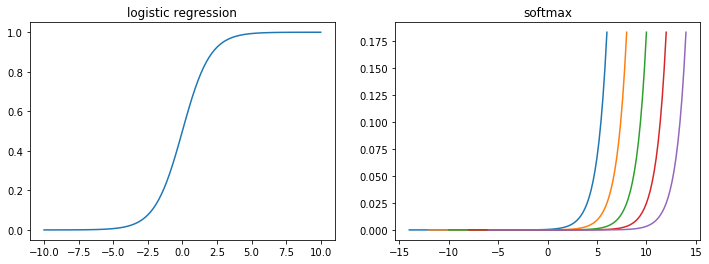

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

n = 100
min_x = -10
max_x = 10

x = torch.linspace(min_x, max_x, n)
ax[0].plot(x, hypothesis_logistic_regression(x))
ax[0].set_title("logistic regression")

offsets = [-4, -2, 0, 2, 4]
X = torch.cat(
    tuple(torch.linspace(min_x + o, max_x + o, n).reshape(1, n) for o in offsets), 0
)
ax[1].plot(X.T, softmax(X).T)
ax[1].set_title("softmax")

## Figure 1: Phase Plane diagrams

In [4]:
Kp = np.array([
    [2, -2],
    [0, 2]
])

Kn = np.array([
    [-2, 0],
    [2, -2]
])

K0 = np.array([
    [0, -1],
    [1, 0]
])

Kdict = {"K+": Kp, "K-": Kn, "K0": K0}

In [5]:
def propagate(K, y, h=1, b=0):
    return y + h*np.tanh(y.dot(K) + b)

In [7]:
y1 = np.r_[0.1, 0.1]
y2 = -y1
y3 = np.r_[0, 0.5]
ydict = {"y1":y1, "y2":y2, "y3":y3}

In [11]:
N = 20
h = 0.1

propagated = {}

for k_key, K in Kdict.items():
    tmp = {}
    for y_key, y in ydict.items():
        Y = np.zeros((2, N+1))
        Y[:, 0] = y
        for i in range(N):
            Y[:, i+1] = propagate(K, Y[:, i], h)
        tmp[y_key] = Y
    propagated[k_key] = tmp
    

In [22]:
# parameters for the quiver plot 
n = 20
x = np.linspace(-1.6, 1.6, n)
y = x

XY = np.meshgrid(x, y)

xy = np.vstack([XY[0].flatten(), XY[1].flatten()])

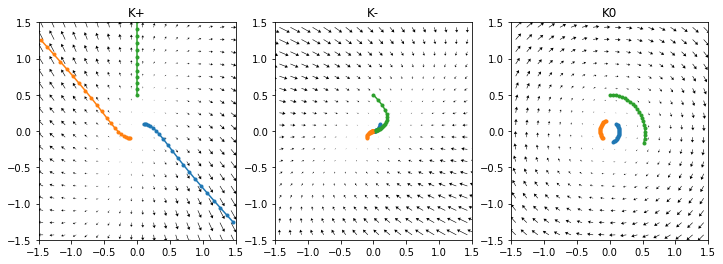

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for a, key in zip(ax, Kdict.keys()):
    K = Kdict[key]
    Kxy = (xy.T).dot(K).T    
    a.quiver(XY[0], XY[1], Kxy[0,:], Kxy[1,:], minshaft=2, headwidth=6)
    a.set_title(key)

    for y_key, Y in propagated[key].items():
        a.plot(Y[0,:], Y[1,:], '-', marker='.')
        
    a.set_xlim(-1.5, 1.5)
    a.set_ylim(-1.5, 1.5)